<a href="https://colab.research.google.com/github/vian2298/Mineria-de-datos/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas unidecode wordcloud sklearn nltk tqdm gensim annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.2 MB/s 
     |████████████████████████████████| 647 kB 37.6 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=29b6fd6b7e528520d916498654c79606d0f7e766a64f116fc5e3d57a424bb7ac
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for annoy: filename=annoy-1.17.1-cp37-cp37m-linux_x86_64.whl size=395175 sha256=08d12ea486a6815c6b7626e1a3353d829096fa4f223b5a6d2a29f62f1c107834
  Stored in directory: /root/.cache/pip/wheels/81/94/bf/92cb0e4fef8770fe9c6df0ba588fca30ab7c306b6048ae8a54
Successfully built sklearn annoy


In [1]:
!pip install spanish_sentiment_analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.8 MB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 21.5 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1b25e34737fbe6523caccc5621bb115d943bbba6646092563e0624263976c54d
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# progress bars 
from tqdm.notebook import tqdm
tqdm.pandas()

# text manipulation
'''
#from unidecode import unidecode
import re
import string
import nltk
nltk.download('punkt')

# gensim - for training embedding models
import gensim
#import gensim.similarities.index
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# topic modeling, etc
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans '''

"\n#from unidecode import unidecode\nimport re\nimport string\nimport nltk\nnltk.download('punkt')\n\n# gensim - for training embedding models\nimport gensim\n#import gensim.similarities.index\nimport logging\nlogging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)\n\n# topic modeling, etc\nfrom sklearn.decomposition import PCA\nfrom scipy.cluster.hierarchy import dendrogram\nfrom sklearn.cluster import AgglomerativeClustering, KMeans "

In [5]:
from classifier import *

ImportError: ignored

In [6]:
import seaborn as sns

In [7]:
def get_twitter_df():
    manifest = pd.read_csv(
        'https://raw.githubusercontent.com/cdcmx2020a/group_a_twitter/master/processed_json/manifest.txt',
        header=None,
        names=['jsons'])['jsons'].tolist()
    df = pd.concat(
        [pd.read_json(f'https://github.com/cdcmx2020a/group_a_twitter/blob/master/processed_json/{f}?raw=true', lines=True) 
            for f in tqdm(manifest)],
        axis=0
    )
    # df = df.query('date > 60')
    return df 

In [8]:
tweets_es = get_twitter_df().query('lang == "es"')

  0%|          | 0/74 [00:00<?, ?it/s]

In [9]:
tweets_es

,full_text,lat,lon,date,hashtags,place_type,place_name,country,favorites,retweets,lang
5,7 consejos para que las marcas afronten la cri...,NaN,NaN,78,[],None,None,None,11,3,es
6,RT @marianoemartin: Alejandro Borensztein dice...,NaN,NaN,74,[],None,None,None,0,222,es
8,RT @Icomem_Oficial: Con respecto a las declara...,NaN,NaN,88,[],None,None,None,0,5094,es
11,RT @astrovidenteve: Lo diré nuevamente así me ...,NaN,NaN,80,[],None,None,None,0,89,es
12,Albert Camus vuelve a ser un éxito de ventas. ...,NaN,NaN,67,[],None,None,None,15,5,es
...,...,...,...,...,...,...,...,...,...,...,...
25114,¡Instalan 11 ventiladores más para pacientes C...,NaN,NaN,197,[],None,None,None,1,0,es
25116,"RT @rsuncion54: Todos los que nos contagiamos,...",NaN,NaN,192,[],None,None,None,0,5,es
25117,"RT @ZorlakRules: ""Fallecieron porque para no g...",NaN,NaN,184,[],None,None,None,0,625,es
25130,"RT @hdemauleon: Brutal.\nChoferes, ambulantes,...",NaN,NaN,191,[],None,None,None,0,3487,es


In [10]:
tweets_es=tweets_es.query('country=="MX"').sort_values('date')

In [11]:
clf = SentimentClassifier()

NameError: ignored

In [12]:
tweets_es=tweets_es[['full_text', 'date', 'place_name', 'favorites', 'retweets', 'lat', 'lon']]

In [13]:
sentiment=tweets_es[['full_text', 'date', 'retweets', 'place_name']]

In [14]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

def strip_punctuation(strr):
    for i in punctuation_chars:
        if i in strr:
            strr=strr.replace(i, "")
    return strr

In [15]:
sentiment['full_text']=sentiment['full_text'].apply(strip_punctuation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
sentiment

,full_text,date,retweets,place_name
44542,Me enamoro de coronavirus y se va Listo les sa...,60,0,Benito Juárez
79706,easanchezl checa este hilo https//tco/VJAmrJN6hL,60,0,Bahía de Banderas
59619,El coronavirus llega a cdmx y lo meten en un b...,60,6,Benito Juárez
69316,Oyitessssss HugoRodriguezzp zany_face https//t...,60,0,Hermosillo
99432,Intercambio fluidos con un italiano https//tco...,60,0,Puebla
...,...,...,...,...
14498,Perdió su empleo por COVID-19 y un juez obligó...,198,0,Espita
75038,Ya solo quedan 9 municipios libres de Covid-19...,198,0,Hermosillo
60390,WEY HAY QUE HACER UN RITUAL PARA QUE SE ACABE ...,198,0,Metepec
25123,Mañana regresaría a mí trabajo te odio covid-19,198,0,Tezontepec de Aldama


In [ ]:
sentiment['sentiment']=sentiment['full_text'].apply(clf.predict)

In [ ]:
cases=pd.read_csv('/content/cases.csv')

In [ ]:
cases=cases.drop(columns='Unnamed: 0')

In [ ]:
cases=cases.set_index('date')

In [ ]:
dic=cases.to_dict('dict')

In [ ]:
dic=dic['cases']

In [ ]:
sentiment['cases']=sentiment['date']

In [ ]:
sentiment.cases=sentiment.cases.replace(dic)

In [ ]:
month1=sentiment.query('date<=95')
month4=sentiment.query('date>=165')

In [ ]:
m2=sentiment.query('date<=130')
month2=m2.query('date>95')

In [ ]:
m3=sentiment.query('date<165')
month3=m3.query('date>130')

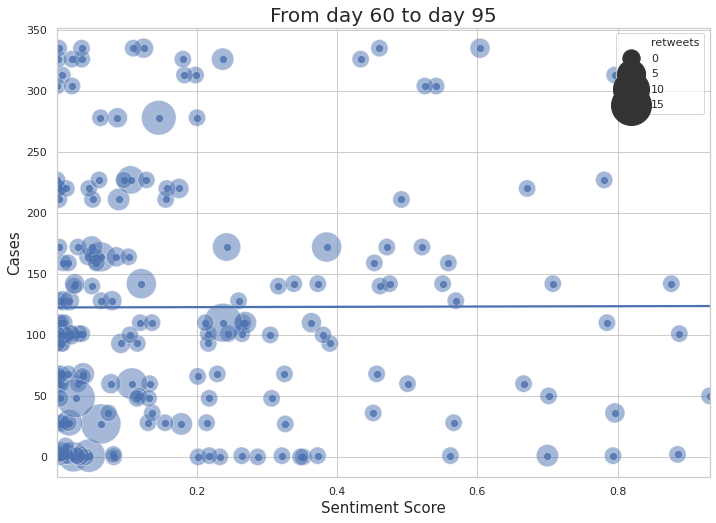

In [ ]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
sns.set_style("whitegrid")

ax1 = sns.scatterplot(x=month1.sentiment, y=month1.cases,
                      size=month1.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
sns.regplot(x=month1.sentiment, y=month1.cases, ci=None, color='b')
ax1.grid(True)
ax1.set_title('From day 60 to day 95',fontsize=20)
ax1.set_xlabel('Sentiment Score',fontsize=15)
ax1.set_ylabel("Cases",fontsize=15)
ax1.figure.savefig("month1.png")


In [ ]:
sentiment=sentiment[['date', 'retweets', 'sentiment', 'cases']]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

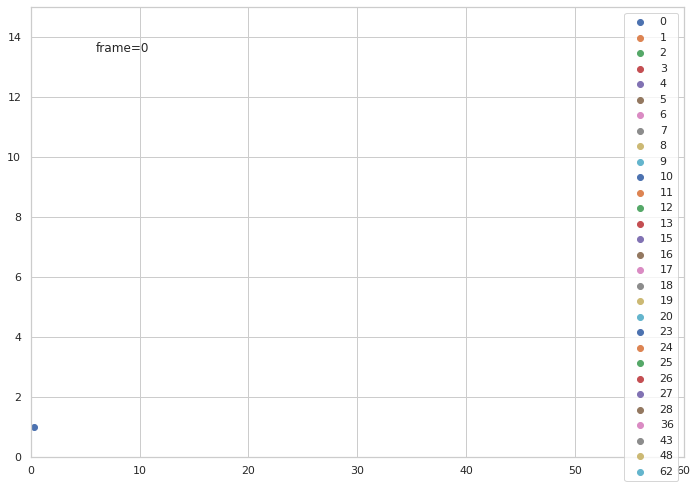

In [ ]:


fig, ax = plt.subplots()
scatters = []
for g,d in month1.groupby('retweets'):
    s = ax.scatter([], [], label=g)
    scatters.append(s)
ax.legend(bbox_to_anchor=(1.,1.), loc=1)
txt = ax.text(0.1,0.9,'frame=0', transform=ax.transAxes)
ax.set_xlim((0,60))
ax.set_ylim((0,15))

def animate(i, df, x, y, hue):
    new_data = df.sample(20) # get new data here
    for c,(groupname,subgroup) in zip(scatters,new_data.groupby(hue)):
        xy = c.get_offsets()
        xy = np.append(xy,subgroup[[x,y]].values, axis=0)
        c.set_offsets(xy)
    txt.set_text('frame={:d}'.format(i))
    return scatters+[txt]

ani = FuncAnimation(fig, animate, fargs=(month, "sentiment", "cases", 'retweets'), frames=10, blit=True)

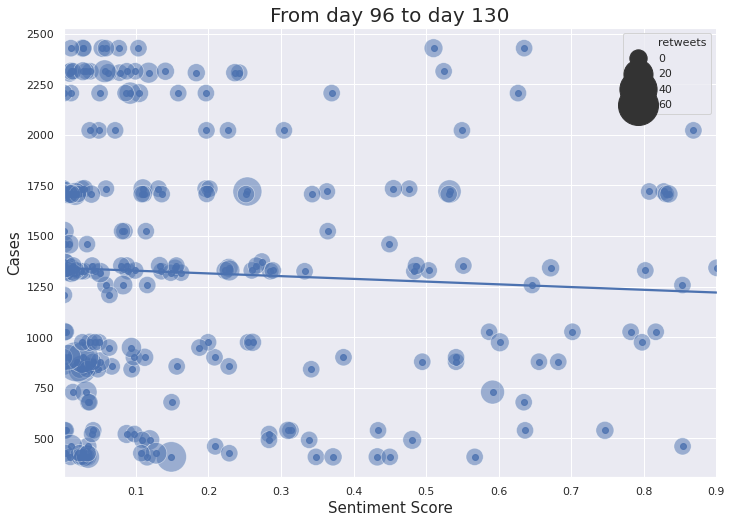

In [ ]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax2 = sns.scatterplot(x=month2.sentiment, y=month2.cases,
                      size=month2.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
sns.regplot(x=month2.sentiment, y=month2.cases, ci=None)
ax2.grid(True)
ax2.set_title('From day 96 to day 130',fontsize=20)
ax2.set_xlabel('Sentiment Score',fontsize=15)
ax2.set_ylabel("Cases",fontsize=15)
ax2.figure.savefig("month2.png")

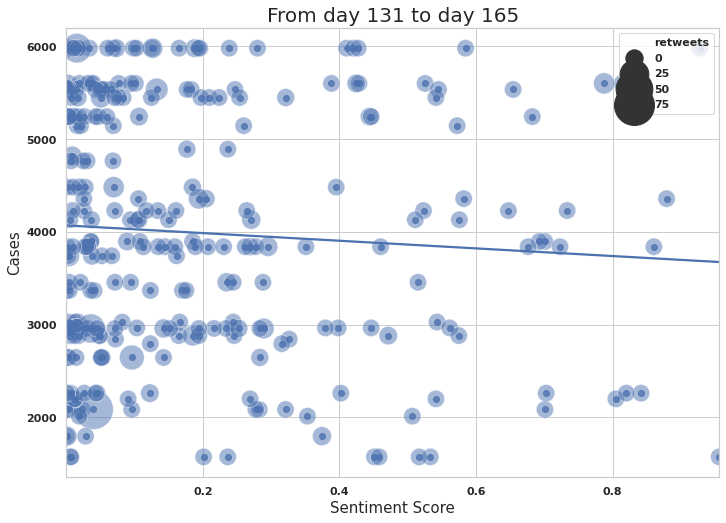

In [ ]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax3 = sns.scatterplot(x=month3.sentiment, y=month3.cases,
                      size=month3.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
sns.regplot(x=month3.sentiment, y=month3.cases, ci=None)
ax3.grid(True)
ax3.set_title('From day 131 to day 165',fontsize=20)
ax3.set_xlabel('Sentiment Score',fontsize=15)
ax3.set_ylabel("Cases",fontsize=15)
ax3.figure.savefig("month3.png")

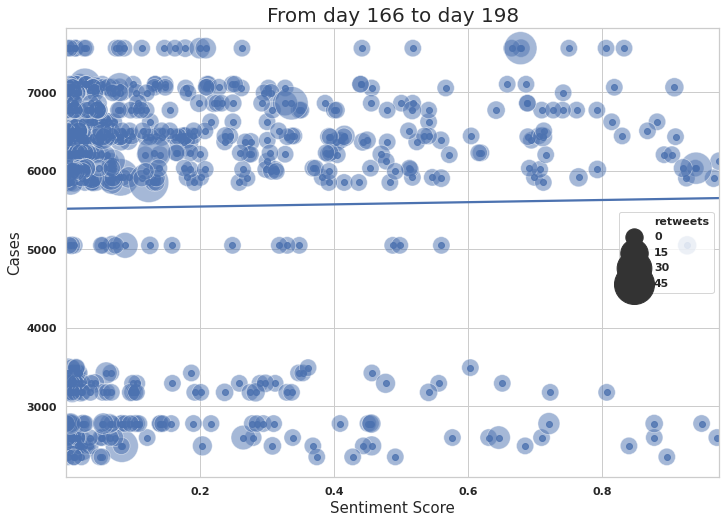

In [ ]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax4 = sns.scatterplot(x=month4.sentiment, y=month4.cases,
                      size=month4.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
sns.regplot(x=month4.sentiment, y=month4.cases, ci=None)
ax4.grid(True)
ax4.set_title('From day 166 to day 198',fontsize=20)
ax4.set_xlabel('Sentiment Score',fontsize=15)
ax4.set_ylabel("Cases",fontsize=15)
ax4.figure.savefig("month4.png")

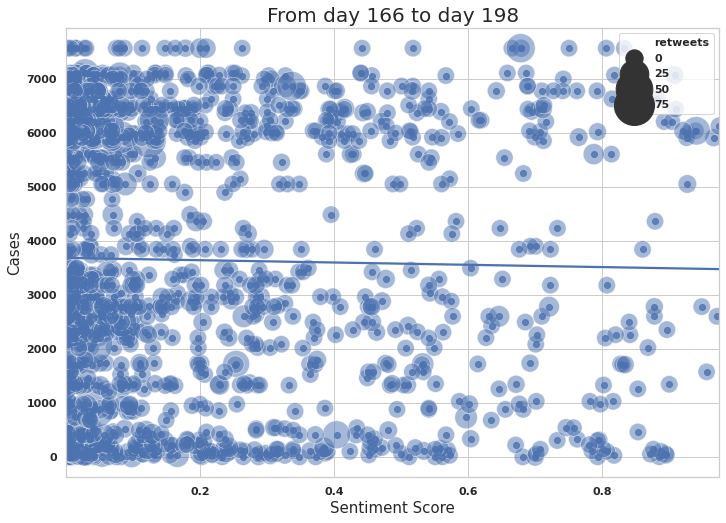

In [ ]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax = sns.scatterplot(x=sentiment.sentiment, y=sentiment.cases,
                      size=sentiment.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
sns.regplot(x=sentiment.sentiment, y=sentiment.cases, ci=None)
ax.grid(True)
ax.set_title('From day 166 to day 198',fontsize=20)
ax.set_xlabel('Sentiment Score',fontsize=15)
ax.set_ylabel("Cases",fontsize=15)
ax.figure.savefig("all_months.png")